![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [1452]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный инструмент для формирования dummies из данных, представленных в виде списка:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [1453]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [1454]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [1455]:
DATA_DIR = ''
df_train = pd.read_csv(DATA_DIR+'main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'sample_submission.csv')

In [1456]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [1457]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [1458]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      10000 non-null  object 
 1   City               10000 non-null  object 
 2   Cuisine Style      7693 non-null   object 
 3   Ranking            10000 non-null  float64
 4   Price Range        6525 non-null   object 
 5   Number of Reviews  9343 non-null   float64
 6   Reviews            9998 non-null   object 
 7   URL_TA             10000 non-null  object 
 8   ID_TA              10000 non-null  object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [1459]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [1460]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [1461]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_id  10000 non-null  object 
 1   Rating         10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [1462]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [1463]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [1464]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
5754,id_5754,Amsterdam,"['American', 'Fast Food', 'Grill', 'European',...",588.0,$,61.0,[['Great burgers but a bigger Portobello woul....,/Restaurant_Review-g188590-d12556266-Reviews-N...,d12556266,0,0.0
12352,id_5136,Barcelona,NaN,5137.0,NaN,12.0,"[['Chilled and relaxed atmosphere', 'Fantastic...",/Restaurant_Review-g187497-d2321413-Reviews-Pr...,d2321413,1,4.0
15266,id_13150,London,"['Italian', 'French', 'International']",13160.0,$$ - $$$,7.0,"[['Reasonable Italian', 'Funky setting for Ita...",/Restaurant_Review-g186338-d720737-Reviews-The...,d720737,1,4.0
1260,id_1260,Brussels,"['Belgian', 'European', 'French']",540.0,$$ - $$$,90.0,"[['Great quality and kind service', 'Good meal...",/Restaurant_Review-g188644-d1943691-Reviews-Re...,d1943691,0,0.0
69,id_69,Paris,"['French', 'European']",2325.0,$$ - $$$,126.0,"[['Local place for a local atmosphere', 'Highl...",/Restaurant_Review-g187147-d5952715-Reviews-Le...,d5952715,0,0.0


In [1465]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Приведем названия колонок в датасете к единому формату для удобства последующей работы

In [1466]:
data.columns

Index(['Restaurant_id', 'City', 'Cuisine Style', 'Ranking', 'Price Range',
       'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA', 'sample', 'Rating'],
      dtype='object')

In [1467]:
data.columns = ['restaurant_id','city','cuisine_style','ranking','price_range','number_of_reviews','reviews','url_ta','id_ta','sample','rating']

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   


## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, даже отсутствие информации может быть важным признаком! Проверим, какие из столбцов содержат пропуски.

In [1468]:
data.isna().sum()

restaurant_id            0
city                     0
cuisine_style        11590
ranking                  0
price_range          17361
number_of_reviews     3200
reviews                  2
url_ta                   0
id_ta                    0
sample                   0
rating                   0
dtype: int64

Для каждого из столбцов выберем свой способ заполнения пропусков. Прежде всего важно заполнить пропуски в числовых признаках, к которым относится, например, количество отзывов number_of_reviews.

In [1469]:
display(data.number_of_reviews.describe())
display(data.number_of_reviews.value_counts())
display(data.number_of_reviews.isna().sum())

count    46800.000000
mean       124.471197
std        294.114345
min          2.000000
25%          9.000000
50%         33.000000
75%        115.000000
max       9660.000000
Name: number_of_reviews, dtype: float64

2.0       2403
3.0       2042
4.0       1707
5.0       1471
6.0       1258
          ... 
5216.0       1
1932.0       1
1050.0       1
1145.0       1
1471.0       1
Name: number_of_reviews, Length: 1573, dtype: int64

3200

В этом случае пропуски могут означать отсутствие отзывов, поэтому заменим пропуски на 0.

In [1470]:
data.number_of_reviews.fillna(0, inplace=True)
display(data.number_of_reviews.describe())
display(data.number_of_reviews.value_counts())

count    50000.000000
mean       116.505040
std        286.173104
min          0.000000
25%          7.000000
50%         28.000000
75%        105.000000
max       9660.000000
Name: number_of_reviews, dtype: float64

0.0       3200
2.0       2403
3.0       2042
4.0       1707
5.0       1471
          ... 
5216.0       1
1932.0       1
1050.0       1
1145.0       1
1471.0       1
Name: number_of_reviews, Length: 1574, dtype: int64

Признак уровня цен price_range не является числовым, а количество пропусков в данном параметре существенное (более 30% от общего количества записей в датасете), т.е. исключать их из анализа некорректно.

In [1471]:
display(data.price_range.describe())
display(data.price_range.value_counts())
display(data.price_range.isna().sum())

count        32639
unique           3
top       $$ - $$$
freq         23041
Name: price_range, dtype: object

$$ - $$$    23041
$            7816
$$$$         1782
Name: price_range, dtype: int64

17361

 При этом данный параметр может быть преобразован в числовые значения на следующем шаге, поэтому для пустых значений используем заполнение отдельным значением '0$', чтобы учесть его в последующей обработке.

In [1472]:
data.price_range.fillna('0$', inplace=True) 
display(data.price_range.describe())
display(data.price_range.value_counts())
display(data.price_range.isna().sum())

count        50000
unique           4
top       $$ - $$$
freq         23041
Name: price_range, dtype: object

$$ - $$$    23041
0$          17361
$            7816
$$$$         1782
Name: price_range, dtype: int64

0

Признак предлагаемой кухни cuisine_style заполнен текстовыми значениями, причем зачастую это набор из нескольких текстовых значений. Кроме того, количество пропусков существенно (превышает 20% от общего количества записей в датасете).

In [1473]:
display(data.cuisine_style.describe())
display(data.cuisine_style.value_counts())
display(data.cuisine_style.isna().sum())

count           38410
unique          10731
top       ['Italian']
freq             1332
Name: cuisine_style, dtype: object

['Italian']                                                                       1332
['French']                                                                        1019
['Spanish']                                                                        860
['French', 'European']                                                             503
['Cafe']                                                                           500
                                                                                  ... 
['Barbecue', 'European', 'Hungarian']                                                1
['Bar', 'Pizza', 'European', 'Pub', 'Slovenian', 'Central European']                 1
['French', 'Wine Bar', 'Delicatessen', 'Vegetarian Friendly', 'Vegan Options']       1
['Pizza', 'Spanish', 'Italian', 'Mediterranean']                                     1
['European', 'Austrian', 'International']                                            1
Name: cuisine_style, Length: 10731, dtype: 

11590

С учетом этого, для пустых значений используем заполнение отдельным значением 'NoInfo', чтобы учесть его в последующей обработке.

In [1474]:
data.cuisine_style.fillna('Other', inplace=True) 
display(data.cuisine_style.describe())
display(data.cuisine_style.value_counts())
display(data.cuisine_style.isna().sum())

count     50000
unique    10732
top       Other
freq      11590
Name: cuisine_style, dtype: object

Other                                                                                                                         11590
['Italian']                                                                                                                    1332
['French']                                                                                                                     1019
['Spanish']                                                                                                                     860
['French', 'European']                                                                                                          503
                                                                                                                              ...  
['Cafe', 'European', 'Turkish', 'Vegetarian Friendly', 'Vegan Options']                                                           1
['Italian', 'Middle Eastern', 'International', 'Gastropub', 'Vegetarian Frie

0

Признак reviews заполнен последними текстами и датами отзывов. Причем в данном списке немного пропусков, но большое количество пустых значений '[[], []]'. Кроме того, количество пропусков не существенно (всего 2 записи в датасете). 

In [1475]:
display(data.reviews.describe())
display(data.reviews.value_counts())
display(data.reviews.isna().sum())

count        49998
unique       41857
top       [[], []]
freq          8112
Name: reviews, dtype: object

[[], []]                                                                                                                              8112
[['Excellent'], ['09/03/2015']]                                                                                                          2
[['Absolutely authentic and delicious!', 'Wonderful discovery'], ['09/30/2017', '08/04/2016']]                                           2
[['Very average food. Over average prices.', 'great food with great service!'], ['11/17/2017', '08/17/2017']]                            2
[['Visited the rooftop bar', 'SIXTH FLOOR ROOFTOP BUT YOU CAN ONLY SEE O...'], ['06/27/2017', '10/31/2017']]                             2
                                                                                                                                      ... 
[['Excellent, food for a fair price', 'Great food'], ['06/15/2017', '04/22/2017']]                                                       1
[['Nice to stop by', 'Will 

2

С учетом этого, для пустых значений используем заполнение наиболее встречающимся значением mode.

In [1476]:
data.reviews.fillna(data.reviews.mode()[0],inplace=True) 
display(data.reviews.describe())
display(data.reviews.value_counts())
display(data.reviews.isna().sum())

count        50000
unique       41857
top       [[], []]
freq          8114
Name: reviews, dtype: object

[[], []]                                                                                                                              8114
[['Excellent'], ['09/03/2015']]                                                                                                          2
[['Absolutely authentic and delicious!', 'Wonderful discovery'], ['09/30/2017', '08/04/2016']]                                           2
[['Very average food. Over average prices.', 'great food with great service!'], ['11/17/2017', '08/17/2017']]                            2
[['Visited the rooftop bar', 'SIXTH FLOOR ROOFTOP BUT YOU CAN ONLY SEE O...'], ['06/27/2017', '10/31/2017']]                             2
                                                                                                                                      ... 
[['Excellent, food for a fair price', 'Great food'], ['06/15/2017', '04/22/2017']]                                                       1
[['Nice to stop by', 'Will 

0

In [1477]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   restaurant_id      50000 non-null  object 
 1   city               50000 non-null  object 
 2   cuisine_style      50000 non-null  object 
 3   ranking            50000 non-null  float64
 4   price_range        50000 non-null  object 
 5   number_of_reviews  50000 non-null  float64
 6   reviews            50000 non-null  object 
 7   url_ta             50000 non-null  object 
 8   id_ta              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [1478]:
display(data.nunique(dropna=False))
data

restaurant_id        13094
city                    31
cuisine_style        10732
ranking              12975
price_range              4
number_of_reviews     1574
reviews              41857
url_ta               49963
id_ta                49963
sample                   2
rating                  10
dtype: int64

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,rating
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,4.5
49996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,3.5
49997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,0$,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,4.5
49998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,4.0


Потенциально потребуют обработки следующие признаки:
   * 1. cuisine_style (126 уникальных значений) - преобразование в dummies
   * 2. city (31 уникальное значение) - преобразование в dummies, дополнение в датасет внешних данных о городах
   * 3. price_range (4 уникальных значения) - преобразование в последовательные числовые значения
   * 4. number_of_reviews - создание нового полиномиального признака (например, путем извлечения квадратного корня для нормализации/ сглаживания распределения значения признака)
   * 5. reviews - выделение информации о датах отзывов и их анализ
   * 6. ranking_vs_city_count - создание нового полиномиального признака

1. cuisine_style (126 уникальных значений) - преобразование в dummies
    - отфильтруем значения, убирая лишние знаки
    - сформируем dummies с использованием MultiLabelBinarizer
    - сформируем перечень ТОР40 cuisine_style, формирующих 90% выборки
    - удалим столбцы с кухнями, не соответcтвующим TOP40 

In [1479]:
def filter_cuisine_style(x):
    x = x.replace('[','')
    x = x.replace(']','')
    x = x.replace("'", '')
    x = x.strip()
    x = [style.strip() for style in x.split(',')]
    x = [style for style in x if len(style) > 0]
    return x

data['cuisine_style'] = data['cuisine_style'].apply(filter_cuisine_style)
data_cuisine_90 = data.explode(column='cuisine_style')
data['cuisine_style1'] = data['cuisine_style']
data = data.join(pd.DataFrame(mlb.fit_transform(data.pop('cuisine_style1')), index=data.index, columns=mlb.classes_))
data

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,...,Ukrainian,Uzbek,Vegan Options,Vegetarian Friendly,Venezuelan,Vietnamese,Welsh,Wine Bar,Xinjiang,Yunnan
0,id_0,Paris,"[Bar, Pub]",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,...,0,0,0,0,0,0,0,0,0,0
1,id_1,Helsinki,"[European, Scandinavian, Gluten Free Options, ...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,...,0,0,1,1,0,0,0,0,0,0
2,id_2,Edinburgh,[Vegetarian Friendly],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,...,0,0,0,1,0,0,0,0,0,0
3,id_3,London,"[Italian, Mediterranean, European, Vegetarian ...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,...,0,0,0,1,0,0,0,0,0,0
4,id_4,Bratislava,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,Milan,"[Italian, Vegetarian Friendly, Vegan Options, ...",500.0,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,...,0,0,1,1,0,0,0,0,0,0
49996,id_6340,Paris,"[French, American, Bar, European, Vegetarian F...",6341.0,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,...,0,0,0,1,0,0,0,0,0,0
49997,id_1649,Stockholm,"[Japanese, Sushi]",1652.0,0$,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,...,0,0,0,0,0,0,0,0,0,0
49998,id_640,Warsaw,"[Polish, European, Eastern European, Central E...",641.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,...,0,0,0,1,0,0,0,0,0,0


In [1480]:
data_cuisine_90 = data_cuisine_90[data_cuisine_90['cuisine_style'] != 'Other']
all_cuisine = data_cuisine_90['cuisine_style'].value_counts()
top_cuisine = all_cuisine.head(40).index
all_cuisine = data_cuisine_90['cuisine_style'].value_counts().index
cuisine_to_throw_away = list(set(all_cuisine) - set(top_cuisine))
len(cuisine_to_throw_away)

85

In [1481]:
data.drop(cuisine_to_throw_away, axis = 1, inplace=True)
data.drop('Other', axis = 1, inplace=True)
data

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,...,Seafood,Soups,Spanish,Steakhouse,Sushi,Thai,Vegan Options,Vegetarian Friendly,Vietnamese,Wine Bar
0,id_0,Paris,"[Bar, Pub]",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,...,0,0,0,0,0,0,0,0,0,0
1,id_1,Helsinki,"[European, Scandinavian, Gluten Free Options, ...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,...,0,0,0,0,0,0,1,1,0,0
2,id_2,Edinburgh,[Vegetarian Friendly],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,...,0,0,0,0,0,0,0,1,0,0
3,id_3,London,"[Italian, Mediterranean, European, Vegetarian ...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,...,0,0,0,0,0,0,0,1,0,0
4,id_4,Bratislava,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,Milan,"[Italian, Vegetarian Friendly, Vegan Options, ...",500.0,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,...,0,0,0,0,0,0,1,1,0,0
49996,id_6340,Paris,"[French, American, Bar, European, Vegetarian F...",6341.0,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,...,0,0,0,0,0,0,0,1,0,0
49997,id_1649,Stockholm,"[Japanese, Sushi]",1652.0,0$,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,...,0,0,0,0,1,0,0,0,0,0
49998,id_640,Warsaw,"[Polish, European, Eastern European, Central E...",641.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,...,0,0,0,0,0,0,0,1,0,0


2. city (31 уникальное значение) - преобразование в dummies

In [1482]:
dummies_city = pd.get_dummies(data.city).rename(columns=lambda x: str(x))
data = pd.concat([data, dummies_city], axis=1)
data

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,...,Munich,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich
0,id_0,Paris,"[Bar, Pub]",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,...,0,0,0,1,0,0,0,0,0,0
1,id_1,Helsinki,"[European, Scandinavian, Gluten Free Options, ...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,...,0,0,0,0,0,0,0,0,0,0
2,id_2,Edinburgh,[Vegetarian Friendly],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,...,0,0,0,0,0,0,0,0,0,0
3,id_3,London,"[Italian, Mediterranean, European, Vegetarian ...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,...,0,0,0,0,0,0,0,0,0,0
4,id_4,Bratislava,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,Milan,"[Italian, Vegetarian Friendly, Vegan Options, ...",500.0,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,...,0,0,0,0,0,0,0,0,0,0
49996,id_6340,Paris,"[French, American, Bar, European, Vegetarian F...",6341.0,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,...,0,0,0,1,0,0,0,0,0,0
49997,id_1649,Stockholm,"[Japanese, Sushi]",1652.0,0$,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,...,0,0,0,0,0,0,1,0,0,0
49998,id_640,Warsaw,"[Polish, European, Eastern European, Central E...",641.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,...,0,0,0,0,0,0,0,0,1,0


2. city (31 уникальное значение) - дополнение в датасет внешних данных о городах
    - Добавим словарь с внешними данными о численности населения городов. Единицы  измерения -  тысячи человек. Данные взяты из википедии на 2019 год
    - Добавим новый признак численности населения city_count в городе в датасет

In [1483]:
city_dict = {'London':8982,'Paris':2148,'Madrid':6642,'Barcelona':5575, 'Berlin':3769, 'Milan':1352,
            'Rome':2873, 'Prague':1309, 'Lisbon': 0.504718, 'Vienna':1897, 'Amsterdam': 0.821752,'Brussels': 0.174383, 'Budapest':1.752, 'Dublin': 1.388,
           'Copenhagen':0.602481,'Athens':0.664046,'Edinburgh':0.482005, 'Zurich':0.402762, 'Oporto':0.214349,'Geneva':0.499408,'Hamburg':1.899, 'Stockholm':0.975904, 'Munich':1.473, 'Warsaw':1.798,
             'Krakow':0.769498,'Lyon':0.513275,'Oslo':0.681067,'Helsinki':0.631695, 'Bratislava':0.422428,'Luxembourg':0.613894,'Ljubljana':0.279631}
display(city_dict)

data['city_count'] = data.city
data['city_count'] = data['city_count'].replace(to_replace=city_dict)
data

{'London': 8982,
 'Paris': 2148,
 'Madrid': 6642,
 'Barcelona': 5575,
 'Berlin': 3769,
 'Milan': 1352,
 'Rome': 2873,
 'Prague': 1309,
 'Lisbon': 0.504718,
 'Vienna': 1897,
 'Amsterdam': 0.821752,
 'Brussels': 0.174383,
 'Budapest': 1.752,
 'Dublin': 1.388,
 'Copenhagen': 0.602481,
 'Athens': 0.664046,
 'Edinburgh': 0.482005,
 'Zurich': 0.402762,
 'Oporto': 0.214349,
 'Geneva': 0.499408,
 'Hamburg': 1.899,
 'Stockholm': 0.975904,
 'Munich': 1.473,
 'Warsaw': 1.798,
 'Krakow': 0.769498,
 'Lyon': 0.513275,
 'Oslo': 0.681067,
 'Helsinki': 0.631695,
 'Bratislava': 0.422428,
 'Luxembourg': 0.613894,
 'Ljubljana': 0.279631}

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,...,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich,city_count
0,id_0,Paris,"[Bar, Pub]",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,...,0,0,1,0,0,0,0,0,0,2148.000000
1,id_1,Helsinki,"[European, Scandinavian, Gluten Free Options, ...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,...,0,0,0,0,0,0,0,0,0,0.631695
2,id_2,Edinburgh,[Vegetarian Friendly],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,...,0,0,0,0,0,0,0,0,0,0.482005
3,id_3,London,"[Italian, Mediterranean, European, Vegetarian ...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,...,0,0,0,0,0,0,0,0,0,8982.000000
4,id_4,Bratislava,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,...,0,0,0,0,0,0,0,0,0,0.422428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,Milan,"[Italian, Vegetarian Friendly, Vegan Options, ...",500.0,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,...,0,0,0,0,0,0,0,0,0,1352.000000
49996,id_6340,Paris,"[French, American, Bar, European, Vegetarian F...",6341.0,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,...,0,0,1,0,0,0,0,0,0,2148.000000
49997,id_1649,Stockholm,"[Japanese, Sushi]",1652.0,0$,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,...,0,0,0,0,0,1,0,0,0,0.975904
49998,id_640,Warsaw,"[Polish, European, Eastern European, Central E...",641.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,...,0,0,0,0,0,0,0,1,0,1.798000


3. price_range (4 уникальных значения) - преобразование в последовательные числовые значения
    - заменим последовательными числами 0,1,2,3

In [1484]:
price_dict = {'0$':0,'$':1,'$$ - $$$':2,'$$$$':3}
data.price_range = data.price_range.replace(to_replace=price_dict)
display(data.price_range.value_counts())
data

2    23041
0    17361
1     7816
3     1782
Name: price_range, dtype: int64

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,...,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich,city_count
0,id_0,Paris,"[Bar, Pub]",12963.0,2,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,...,0,0,1,0,0,0,0,0,0,2148.000000
1,id_1,Helsinki,"[European, Scandinavian, Gluten Free Options, ...",106.0,2,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,...,0,0,0,0,0,0,0,0,0,0.631695
2,id_2,Edinburgh,[Vegetarian Friendly],810.0,2,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,...,0,0,0,0,0,0,0,0,0,0.482005
3,id_3,London,"[Italian, Mediterranean, European, Vegetarian ...",1669.0,3,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,...,0,0,0,0,0,0,0,0,0,8982.000000
4,id_4,Bratislava,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,3,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,...,0,0,0,0,0,0,0,0,0,0.422428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,Milan,"[Italian, Vegetarian Friendly, Vegan Options, ...",500.0,2,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,...,0,0,0,0,0,0,0,0,0,1352.000000
49996,id_6340,Paris,"[French, American, Bar, European, Vegetarian F...",6341.0,2,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,...,0,0,1,0,0,0,0,0,0,2148.000000
49997,id_1649,Stockholm,"[Japanese, Sushi]",1652.0,0,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,...,0,0,0,0,0,1,0,0,0,0.975904
49998,id_640,Warsaw,"[Polish, European, Eastern European, Central E...",641.0,2,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,...,0,0,0,0,0,0,0,1,0,1.798000


4. number_of_reviews - создание нового полиномиального признака
    - проанализируем значения признака и его распределение
    - протестируем возможность нормализации сглаживания распределения путем применения полиномиальных значений
    - создадим новый признак sqrt_number_of_reviews и добавим его в датасет

count    50000.000000
mean       116.505040
std        286.173104
min          0.000000
25%          7.000000
50%         28.000000
75%        105.000000
max       9660.000000
Name: number_of_reviews, dtype: float64

(array([4.9145e+04, 6.6800e+02, 1.1200e+02, 4.0000e+01, 1.7000e+01,
        7.0000e+00, 6.0000e+00, 3.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([   0.,  966., 1932., 2898., 3864., 4830., 5796., 6762., 7728.,
        8694., 9660.]),
 <a list of 10 Patch objects>)

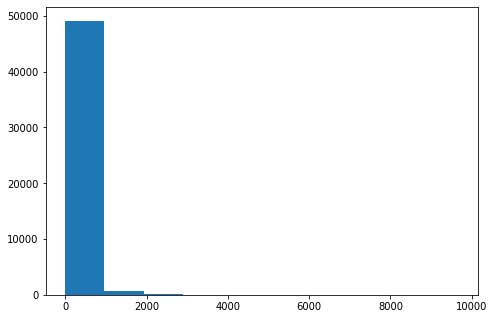

In [1485]:
display(data.number_of_reviews.describe())

fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(data.number_of_reviews)

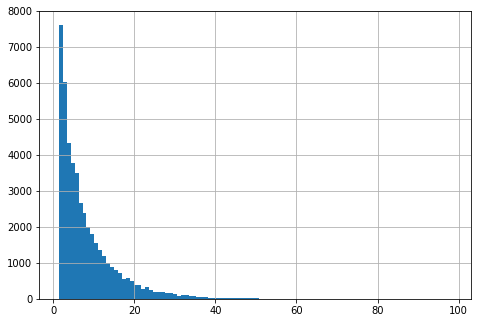

In [1486]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
np.sqrt(data.number_of_reviews[data.number_of_reviews > 0]).hist(bins=100)

In [1487]:
data['sqrt_number_of_reviews'] = round(np.sqrt(data.number_of_reviews[data.number_of_reviews >= 0]))
data

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,...,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich,city_count,sqrt_number_of_reviews
0,id_0,Paris,"[Bar, Pub]",12963.0,2,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,...,0,1,0,0,0,0,0,0,2148.000000,2.0
1,id_1,Helsinki,"[European, Scandinavian, Gluten Free Options, ...",106.0,2,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,...,0,0,0,0,0,0,0,0,0.631695,10.0
2,id_2,Edinburgh,[Vegetarian Friendly],810.0,2,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,...,0,0,0,0,0,0,0,0,0.482005,5.0
3,id_3,London,"[Italian, Mediterranean, European, Vegetarian ...",1669.0,3,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,...,0,0,0,0,0,0,0,0,8982.000000,14.0
4,id_4,Bratislava,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,3,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,...,0,0,0,0,0,0,0,0,0.422428,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,Milan,"[Italian, Vegetarian Friendly, Vegan Options, ...",500.0,2,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,...,0,0,0,0,0,0,0,0,1352.000000,9.0
49996,id_6340,Paris,"[French, American, Bar, European, Vegetarian F...",6341.0,2,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,...,0,1,0,0,0,0,0,0,2148.000000,23.0
49997,id_1649,Stockholm,"[Japanese, Sushi]",1652.0,0,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,...,0,0,0,0,1,0,0,0,0.975904,2.0
49998,id_640,Warsaw,"[Polish, European, Eastern European, Central E...",641.0,2,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,...,0,0,0,0,0,0,1,0,1.798000,8.0


5. reviews - выделение информации о датах отзывов и их анализ
    - отфильтруем данные об отзывах (отсеим пустые данные при помощи функции)
    - выделим даты 1 и 2 отзывов, а также дельту во времени между ними
    - добавим dates_of_reviews, date_1, date_2 и timedelta в датасет
    - пустые значения timedelta заполним mode

In [1488]:
def new_reviews(x):
    if x == '[[], []]':
        return []
    else:
        x = x.replace(']]', '')
        x = x.replace("'", '')
        x = x.split('], [')[1]
        x = x.split(', ')
        return x
data['dates_of_reviews'] = data['reviews'].apply(new_reviews)
data[['date_1', 'date_2']] = pd.DataFrame(data['dates_of_reviews'].tolist())

data['date_1'] = pd.to_datetime(data['date_1']).dt.date #Дата первого отзыва.
data['date_2'] = pd.to_datetime(data['date_2']).dt.date #Дата второго отзыва.
data['timedelta'] = data['date_1'] - data['date_2']

display(data.timedelta.describe())
display(data.timedelta.value_counts())
display(data.timedelta.isna().sum())
data

count                       36206
mean     124 days 17:32:20.297188
std      233 days 00:12:16.906120
min           -362 days +00:00:00
25%              13 days 00:00:00
50%              55 days 00:00:00
75%             157 days 00:00:00
max            3296 days 00:00:00
Name: timedelta, dtype: object

1 days       814
0 days       631
2 days       618
3 days       594
4 days       524
            ... 
1578 days      1
1960 days      1
1489 days      1
1555 days      1
1137 days      1
Name: timedelta, Length: 1650, dtype: int64

13794

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,...,Stockholm,Vienna,Warsaw,Zurich,city_count,sqrt_number_of_reviews,dates_of_reviews,date_1,date_2,timedelta
0,id_0,Paris,"[Bar, Pub]",12963.0,2,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,...,0,0,0,0,2148.000000,2.0,[],NaT,NaT,NaT
1,id_1,Helsinki,"[European, Scandinavian, Gluten Free Options, ...",106.0,2,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,...,0,0,0,0,0.631695,10.0,"[12/05/2017, 10/29/2017]",2017-12-05,2017-10-29,37 days
2,id_2,Edinburgh,[Vegetarian Friendly],810.0,2,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,...,0,0,0,0,0.482005,5.0,"[12/28/2017, 12/06/2017]",2017-12-28,2017-12-06,22 days
3,id_3,London,"[Italian, Mediterranean, European, Vegetarian ...",1669.0,3,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,...,0,0,0,0,8982.000000,14.0,"[12/06/2017, 11/22/2017]",2017-12-06,2017-11-22,14 days
4,id_4,Bratislava,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,3,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,...,0,0,0,0,0.422428,13.0,"[02/08/2018, 01/24/2018]",2018-02-08,2018-01-24,15 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,Milan,"[Italian, Vegetarian Friendly, Vegan Options, ...",500.0,2,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,...,0,0,0,0,1352.000000,9.0,"[12/16/2017, 11/12/2017]",2017-12-16,2017-11-12,34 days
49996,id_6340,Paris,"[French, American, Bar, European, Vegetarian F...",6341.0,2,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,...,0,0,0,0,2148.000000,23.0,"[12/21/2017, 12/12/2017]",2017-12-21,2017-12-12,9 days
49997,id_1649,Stockholm,"[Japanese, Sushi]",1652.0,0,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,...,1,0,0,0,0.975904,2.0,"[11/03/2016, 04/12/2008]",2016-11-03,2008-04-12,3127 days
49998,id_640,Warsaw,"[Polish, European, Eastern European, Central E...",641.0,2,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,...,0,0,1,0,1.798000,8.0,"[07/11/2017, 06/18/2017]",2017-07-11,2017-06-18,23 days


In [1489]:
data.timedelta.fillna(data.timedelta.mode()[0],inplace=True) 
display(data.timedelta.describe())
display(data.timedelta.value_counts())
display(data.timedelta.isna().sum())

count                       50000
mean      90 days 14:18:09.216000
std      205 days 20:18:47.696032
min           -362 days +00:00:00
25%               1 days 00:00:00
50%              20 days 00:00:00
75%             105 days 00:00:00
max            3296 days 00:00:00
Name: timedelta, dtype: object

1 days       14608
0 days         631
2 days         618
3 days         594
4 days         524
             ...  
3207 days        1
1063 days        1
1346 days        1
1561 days        1
1208 days        1
Name: timedelta, Length: 1650, dtype: int64

0

6. ranking_vs_city_count - создание нового полиномиального признака
    - проаналищируем соотношение ranking и city_count
    - создадим новый признак ranking_vs_city_count и добавим его в датасет

(array([43363.,  3706.,  1317.,   683.,   241.,   138.,   134.,   145.,
          137.,   136.]),
 array([1.11333779e-04, 1.72379198e+03, 3.44758386e+03, 5.17137573e+03,
        6.89516760e+03, 8.61895947e+03, 1.03427513e+04, 1.20665432e+04,
        1.37903351e+04, 1.55141270e+04, 1.72379188e+04]),
 <a list of 10 Patch objects>)

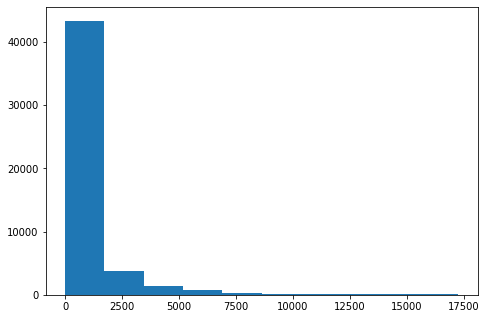

In [1490]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(data.ranking/data.city_count)

In [1491]:
data['ranking_vs_city_count'] = data['ranking']/data['city_count']
data['log_ranking_vs_city_count'] = np.log(data.ranking_vs_city_count)
data

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,url_ta,id_ta,sample,...,Warsaw,Zurich,city_count,sqrt_number_of_reviews,dates_of_reviews,date_1,date_2,timedelta,ranking_vs_city_count,log_ranking_vs_city_count
0,id_0,Paris,"[Bar, Pub]",12963.0,2,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,...,0,0,2148.000000,2.0,[],NaT,NaT,1 days,6.034916,1.797562
1,id_1,Helsinki,"[European, Scandinavian, Gluten Free Options, ...",106.0,2,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,...,0,0,0.631695,10.0,"[12/05/2017, 10/29/2017]",2017-12-05,2017-10-29,37 days,167.802500,5.122788
2,id_2,Edinburgh,[Vegetarian Friendly],810.0,2,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,...,0,0,0.482005,5.0,"[12/28/2017, 12/06/2017]",2017-12-28,2017-12-06,22 days,1680.480493,7.426835
3,id_3,London,"[Italian, Mediterranean, European, Vegetarian ...",1669.0,3,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,...,0,0,8982.000000,14.0,"[12/06/2017, 11/22/2017]",2017-12-06,2017-11-22,14 days,0.185816,-1.682998
4,id_4,Bratislava,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,3,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,...,0,0,0.422428,13.0,"[02/08/2018, 01/24/2018]",2018-02-08,2018-01-24,15 days,87.588891,4.472654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,Milan,"[Italian, Vegetarian Friendly, Vegan Options, ...",500.0,2,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,...,0,0,1352.000000,9.0,"[12/16/2017, 11/12/2017]",2017-12-16,2017-11-12,34 days,0.369822,-0.994732
49996,id_6340,Paris,"[French, American, Bar, European, Vegetarian F...",6341.0,2,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,...,0,0,2148.000000,23.0,"[12/21/2017, 12/12/2017]",2017-12-21,2017-12-12,9 days,2.952048,1.082499
49997,id_1649,Stockholm,"[Japanese, Sushi]",1652.0,0,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,...,0,0,0.975904,2.0,"[11/03/2016, 04/12/2008]",2016-11-03,2008-04-12,3127 days,1692.789455,7.434133
49998,id_640,Warsaw,"[Polish, European, Eastern European, Central E...",641.0,2,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,...,1,0,1.798000,8.0,"[07/11/2017, 06/18/2017]",2017-07-11,2017-06-18,23 days,356.507230,5.876355


# EDA 
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.


### Посмотрим распределение признака

93.0       22
72.0       21
491.0      21
842.0      21
1013.0     20
           ..
8027.0      1
10415.0     1
14621.0     1
11766.0     1
10585.0     1
Name: ranking, Length: 12975, dtype: int64

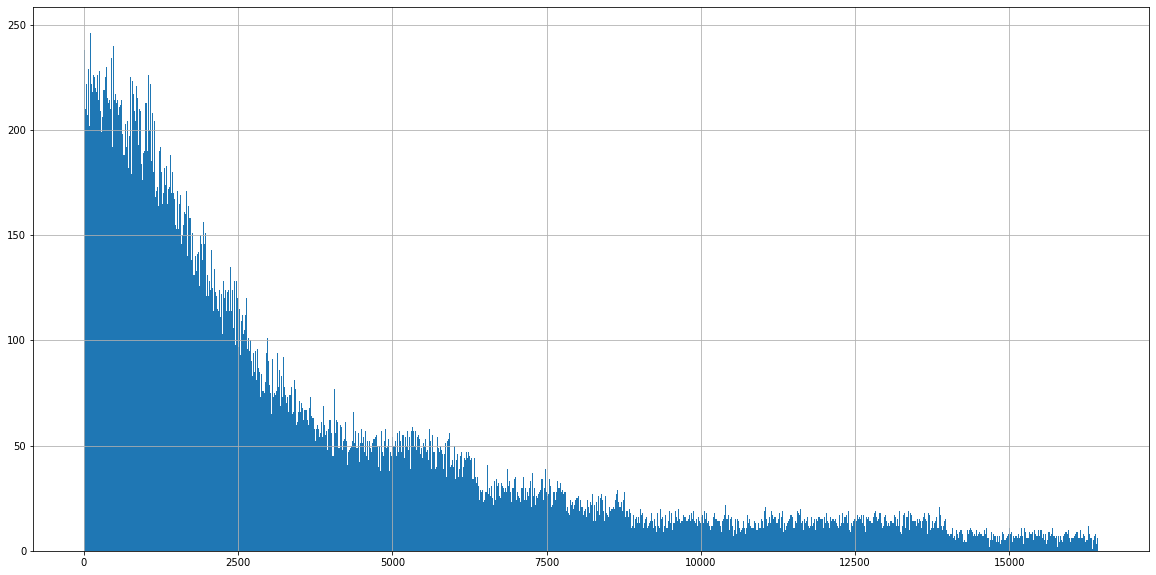

In [1492]:
plt.rcParams['figure.figsize'] = (20,10)
data['ranking'].hist(bins=1000)
data['ranking'].value_counts()

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

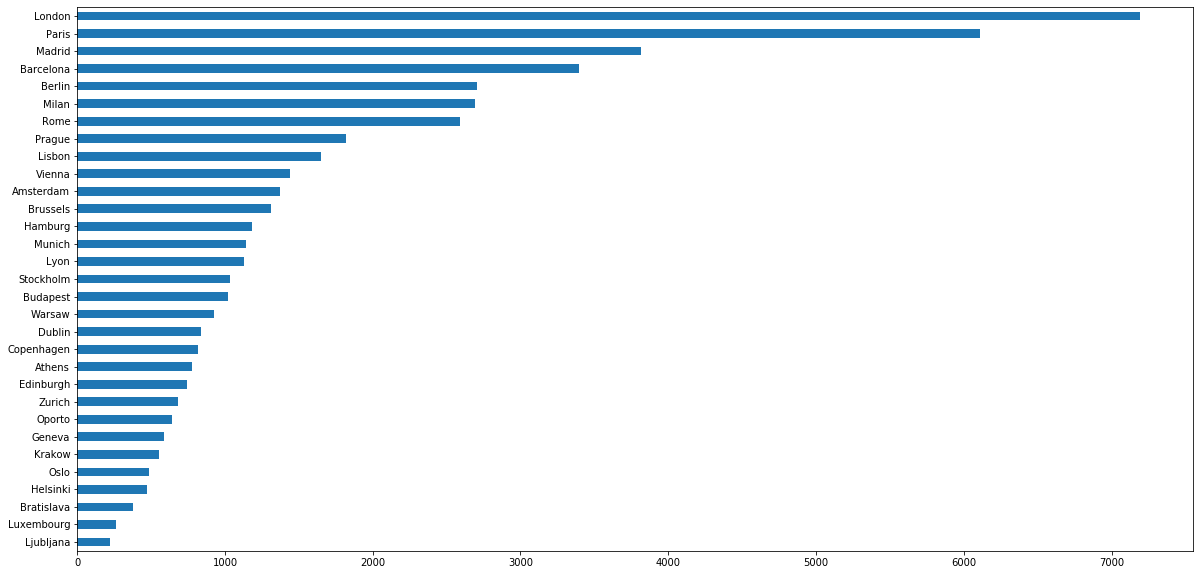

In [1493]:
data['city'].value_counts(ascending=True).plot(kind='barh')

In [1494]:
data.columns

Index(['restaurant_id', 'city', 'cuisine_style', 'ranking', 'price_range',
       'number_of_reviews', 'reviews', 'url_ta', 'id_ta', 'sample', 'rating',
       'American', 'Asian', 'Bar', 'Barbecue', 'British', 'Cafe',
       'Central European', 'Chinese', 'Contemporary', 'Czech',
       'Eastern European', 'European', 'Fast Food', 'French', 'Fusion',
       'German', 'Gluten Free Options', 'Greek', 'Grill', 'Halal', 'Healthy',
       'Indian', 'International', 'Italian', 'Japanese', 'Mediterranean',
       'Middle Eastern', 'Pizza', 'Portuguese', 'Pub', 'Seafood', 'Soups',
       'Spanish', 'Steakhouse', 'Sushi', 'Thai', 'Vegan Options',
       'Vegetarian Friendly', 'Vietnamese', 'Wine Bar', 'Amsterdam', 'Athens',
       'Barcelona', 'Berlin', 'Bratislava', 'Brussels', 'Budapest',
       'Copenhagen', 'Dublin', 'Edinburgh', 'Geneva', 'Hamburg', 'Helsinki',
       'Krakow', 'Lisbon', 'Ljubljana', 'London', 'Luxembourg', 'Lyon',
       'Madrid', 'Milan', 'Munich', 'Oporto', 'Oslo', 'Pa

In [1495]:
data['ranking'][data['city'] =='London'].value_counts().sum()

7193

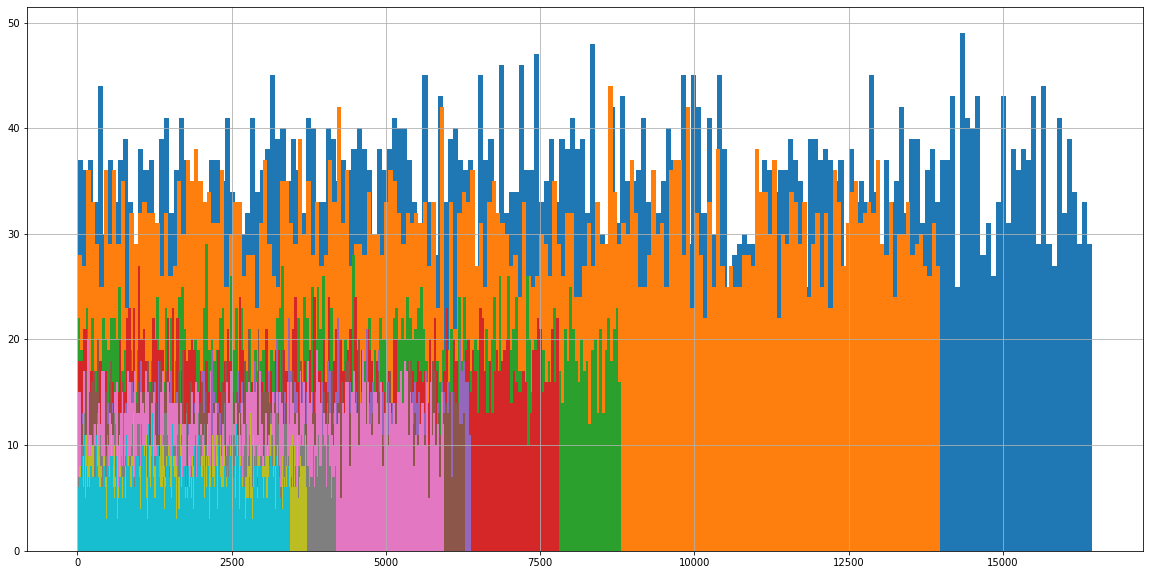

In [1496]:
# посмотрим на топ 10 городов
for x in (data['city'].value_counts())[0:10].index:
    data['ranking'][data['city'] == x].hist(bins=200)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение. 
В связи с этим введем новые переменные 'ranking_vs_city_count' (отношение ranking к city_count), а также 'log_ranking_vs_city_count' (логирифм от ranking_vs_city_count)

### Посмотрим распределение целевой переменной

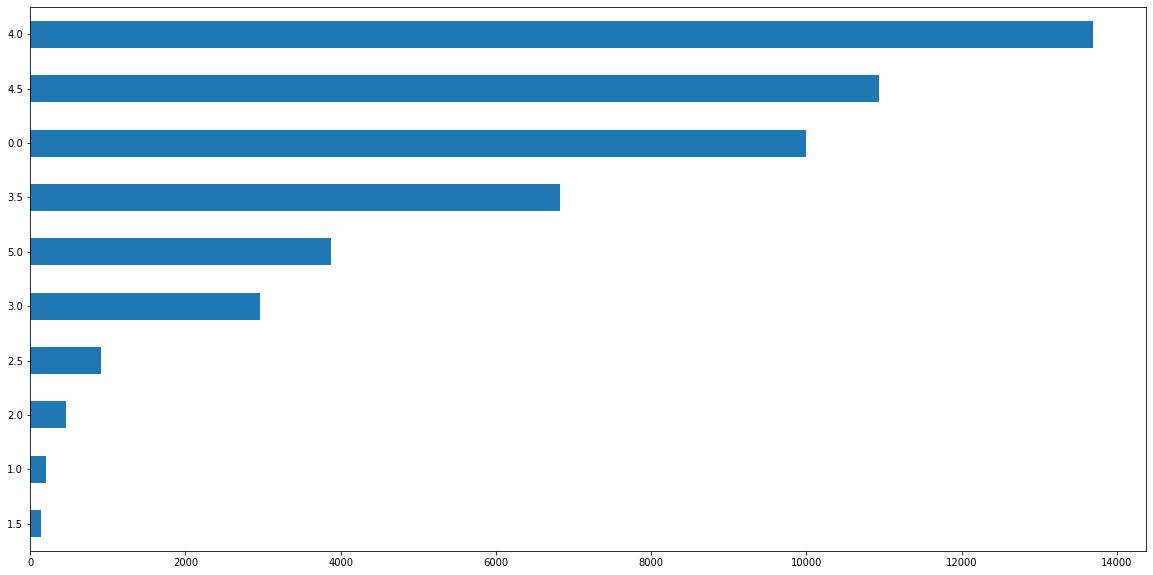

In [1497]:
data['rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

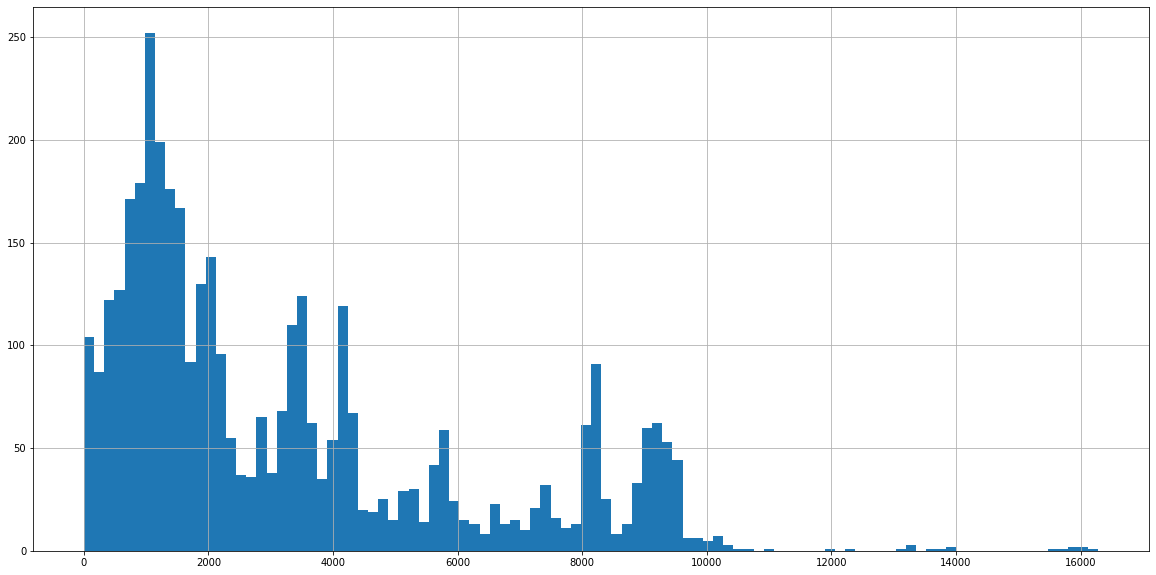

In [1498]:
data['ranking'][data['rating'] == 5].hist(bins=100)

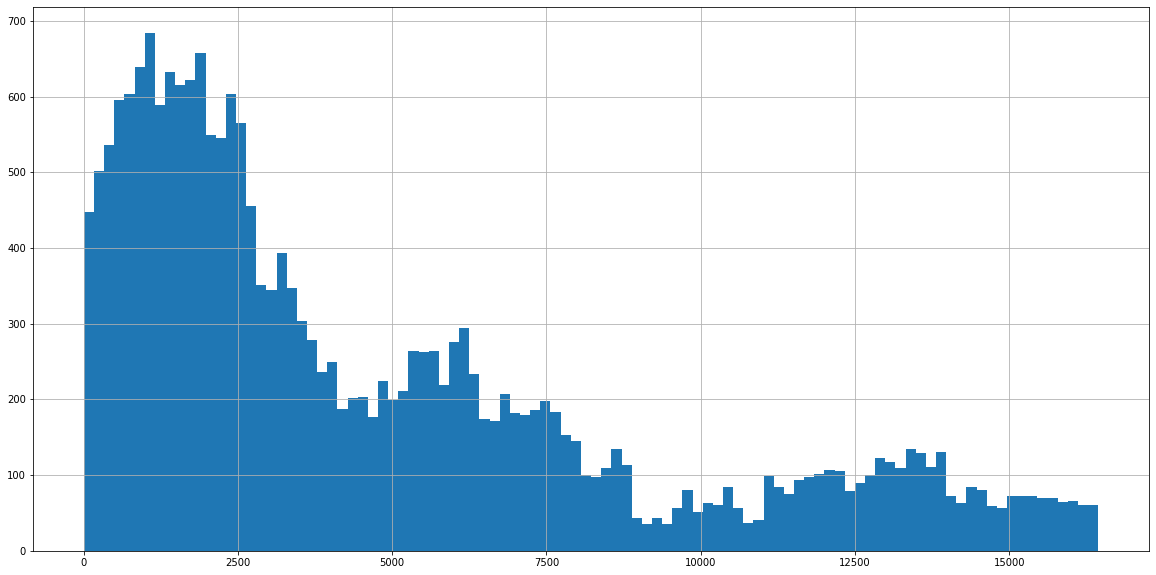

In [1499]:
data['ranking'][data['rating'] < 4].hist(bins=100)

### Посмотрим на корреляцию признаков
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

In [1500]:
data.columns

Index(['restaurant_id', 'city', 'cuisine_style', 'ranking', 'price_range',
       'number_of_reviews', 'reviews', 'url_ta', 'id_ta', 'sample', 'rating',
       'American', 'Asian', 'Bar', 'Barbecue', 'British', 'Cafe',
       'Central European', 'Chinese', 'Contemporary', 'Czech',
       'Eastern European', 'European', 'Fast Food', 'French', 'Fusion',
       'German', 'Gluten Free Options', 'Greek', 'Grill', 'Halal', 'Healthy',
       'Indian', 'International', 'Italian', 'Japanese', 'Mediterranean',
       'Middle Eastern', 'Pizza', 'Portuguese', 'Pub', 'Seafood', 'Soups',
       'Spanish', 'Steakhouse', 'Sushi', 'Thai', 'Vegan Options',
       'Vegetarian Friendly', 'Vietnamese', 'Wine Bar', 'Amsterdam', 'Athens',
       'Barcelona', 'Berlin', 'Bratislava', 'Brussels', 'Budapest',
       'Copenhagen', 'Dublin', 'Edinburgh', 'Geneva', 'Hamburg', 'Helsinki',
       'Krakow', 'Lisbon', 'Ljubljana', 'London', 'Luxembourg', 'Lyon',
       'Madrid', 'Milan', 'Munich', 'Oporto', 'Oslo', 'Pa

Построим тепловую таблицу корреляций для самых значимых для модели признаков (с учетом результатов последнего пункта)
##### ranking, ranking_vs_city_count, number_of_reviews, Madrid, Barselona, Milan, city_count, number_of_reviews.
Удалим для этого все ненужные для корреляции признаки из датасета.

In [1501]:
data_heat = data.drop(columns = ['restaurant_id','city',
       'reviews', 'url_ta', 'id_ta', 'American', 'Asian', 'sample',
       'Bar', 'Barbecue', 'British', 'Cafe', 'Central European', 'Chinese',
       'Contemporary', 'Czech', 'Eastern European', 'European', 'Fast Food',
       'French', 'Fusion', 'German', 'Gluten Free Options', 'Greek', 'Grill',
       'Halal', 'Healthy', 'Indian', 'International', 'Italian', 'Japanese',
       'Mediterranean', 'Middle Eastern', 'Pizza', 'Portuguese', 'Pub',
       'Seafood', 'Soups', 'Spanish', 'Steakhouse', 'Sushi', 'Thai',
       'Vegan Options', 'Vegetarian Friendly', 'Vietnamese', 'Wine Bar',
        'Athens', 'Berlin', 'Bratislava', 'Brussels',
       'Budapest', 'Copenhagen', 'Dublin', 'Edinburgh', 'Hamburg',
       'Krakow', 'Ljubljana', 'London', 'Luxembourg',
       'Lyon', 'Munich', 'Oporto', 'Oslo',
       'Prague', 'Stockholm', 'Vienna', 'Warsaw', 'Zurich',
       'dates_of_reviews', 'date_1',
       'date_2', 'timedelta',
       'log_ranking_vs_city_count', 'Helsinki', 'Geneva', 'Rome', 'Amsterdam', 'Lisbon', 'Paris'], axis=1)

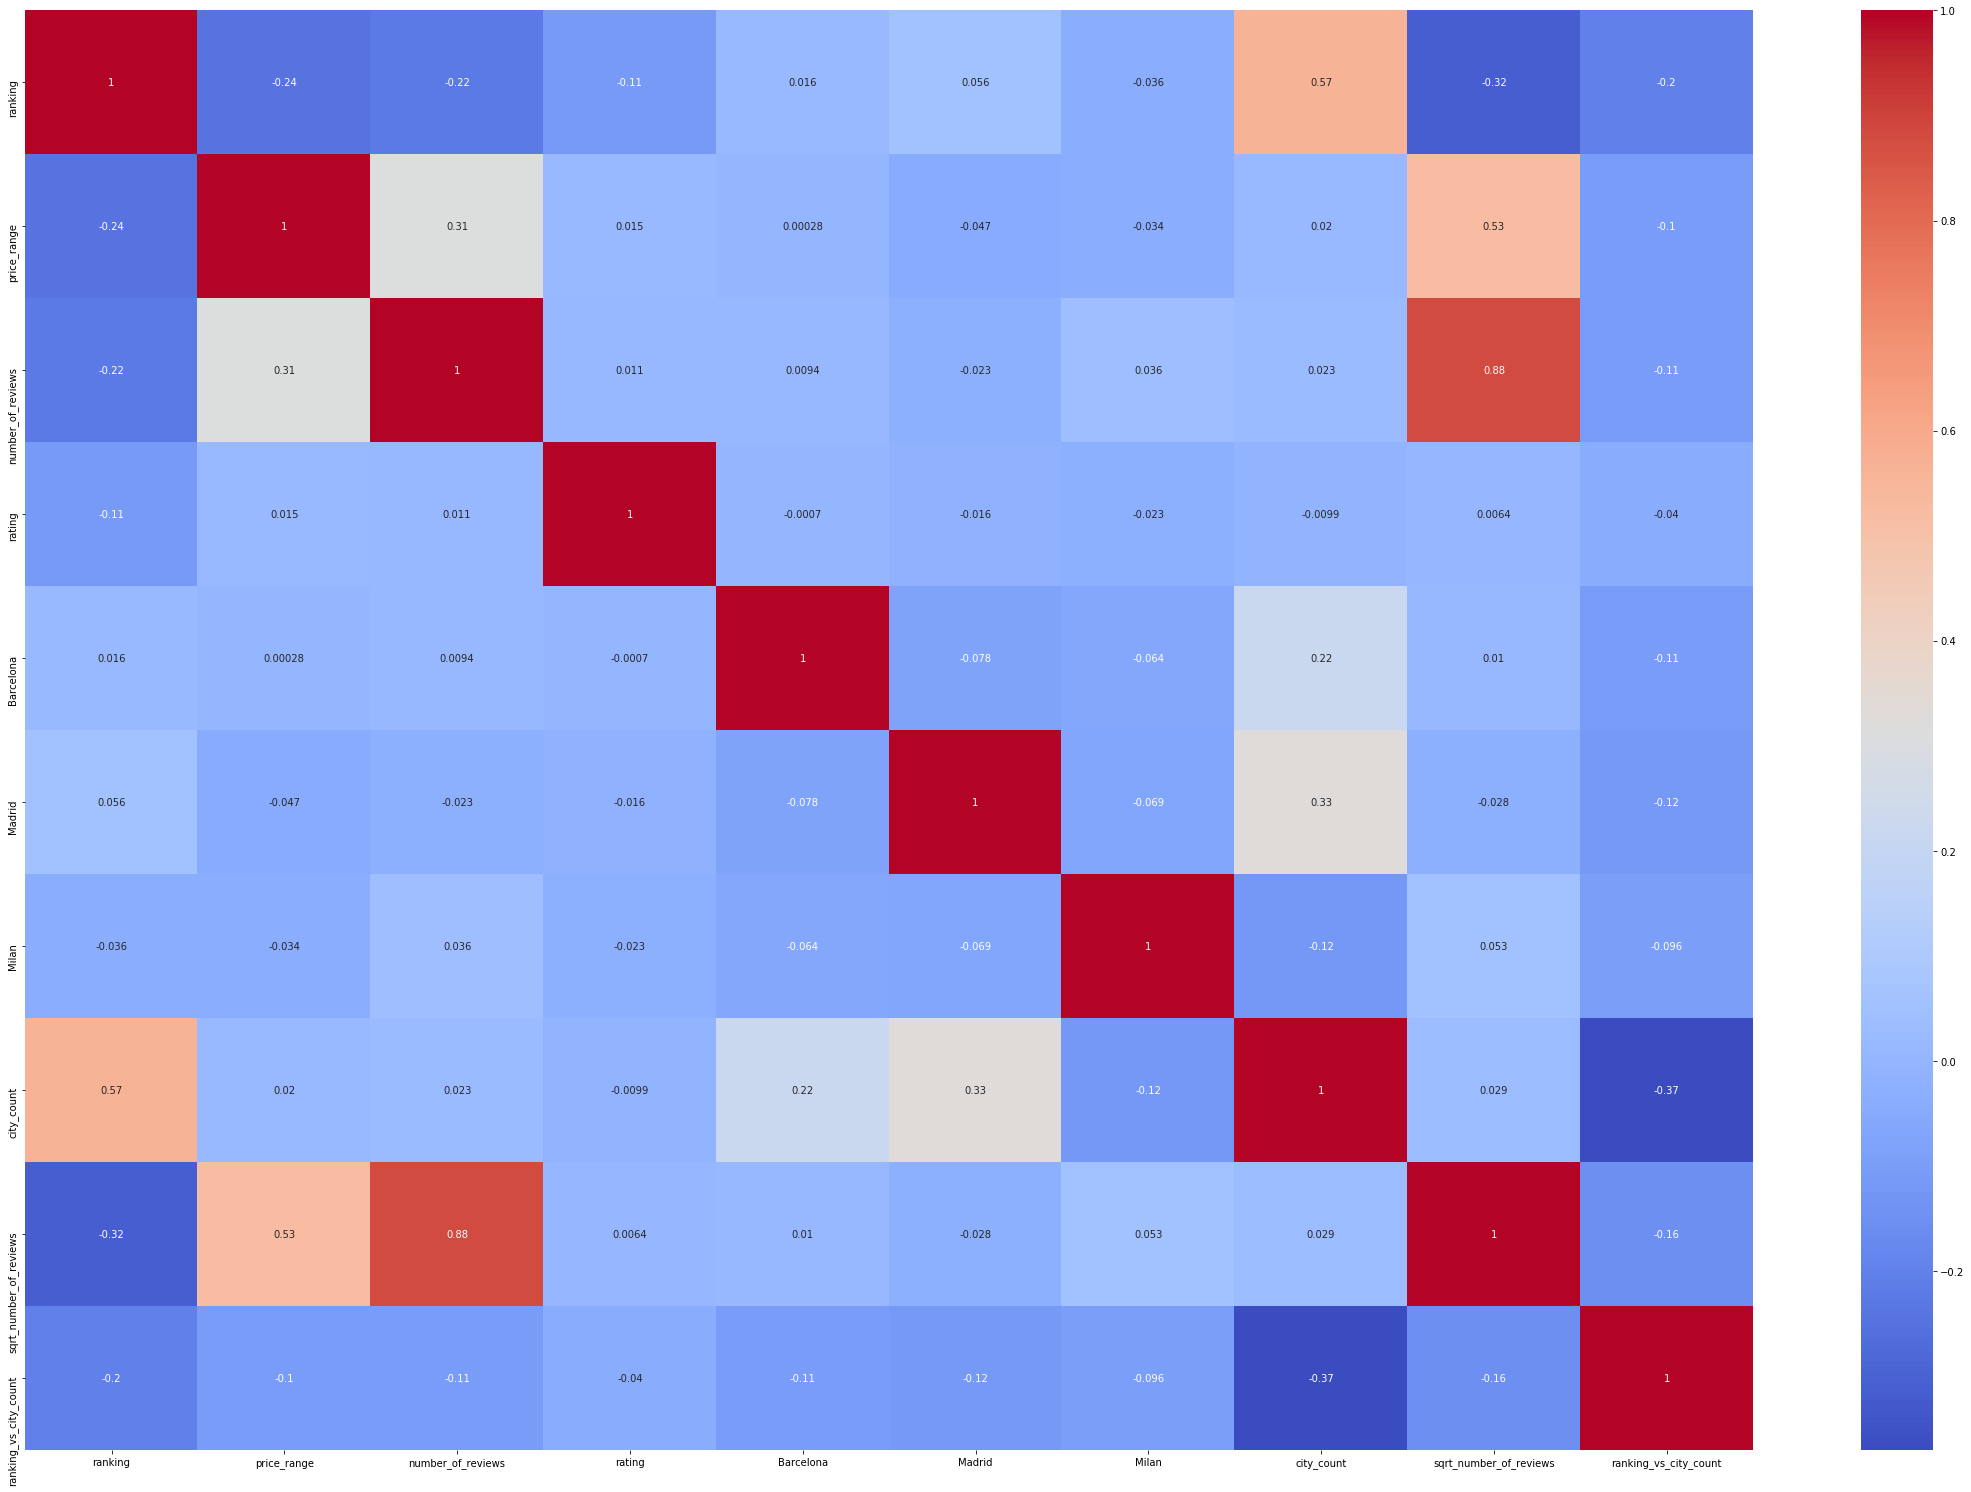

In [1502]:
plt.rcParams['figure.figsize'] = (15,10)
correlation = data_heat.corr()

fig = plt.figure()
axes = fig.add_axes([0, 0, 2, 2])
sns.heatmap(correlation, annot=True, cmap='coolwarm')

Кроме зависимых переменных, которые коррелируют (что вполне ожидаемо), можно отметить корреляцию между переменными 'city_count' и 'ranking', 'price_range' и 'sqrt_number_of_reviews'. Также следует отметить, что корреляции целевой переменной 'rating' нет ни с одной из переменных модели.

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

Посмотрим, где пиццерий больше в Мадрине или в Лондоне?

In [1503]:
data_city_cousine = data.groupby(['city'])[['American', 'Asian', 'Bar', 'Barbecue', 'British', 'Cafe', 'Central European', 'Chinese',
            'Contemporary', 'Czech', 'Eastern European', 'European', 'Fast Food','French', 'Fusion', 'German', 
            'Gluten Free Options', 'Greek', 'Grill', 'Halal', 'Healthy', 'Indian', 'International', 'Italian', 
            'Japanese', 'Mediterranean', 'Middle Eastern', 'Pizza', 'Portuguese', 'Pub', 'Seafood', 'Soups', 
            'Spanish', 'Steakhouse', 'Sushi', 'Thai', 'Vegan Options', 'Vegetarian Friendly', 'Vietnamese', 
            'Wine Bar']].sum()

Получается, что пиццерий больше всего в Риме. Но в Лондоне их больше, чем в Милане. 

In [1505]:
data_city_cousine.Pizza.sort_values(ascending=False)

city
Rome          675
London        478
Milan         412
Paris         248
Barcelona     170
Berlin        141
Madrid        124
Vienna         99
Prague         94
Budapest       73
Brussels       71
Amsterdam      71
Dublin         71
Edinburgh      69
Munich         65
Krakow         57
Lyon           56
Stockholm      55
Warsaw         50
Lisbon         49
Zurich         47
Copenhagen     46
Geneva         44
Helsinki       39
Hamburg        38
Oslo           35
Bratislava     32
Ljubljana      30
Athens         25
Luxembourg     23
Oporto         15
Name: Pizza, dtype: int64

In [ ]:
Ресторанов суши больше всего в Лондоне и Париже (по крайней мере из городов, представленных в списке).

In [1506]:
data_city_cousine.Sushi.sort_values(ascending=False)

city
London        200
Paris         162
Milan         119
Barcelona     102
Berlin         85
Madrid         72
Stockholm      62
Rome           56
Vienna         51
Hamburg        45
Lisbon         44
Warsaw         43
Oslo           41
Copenhagen     41
Prague         37
Munich         36
Amsterdam      34
Helsinki       26
Brussels       22
Zurich         20
Luxembourg     18
Oporto         18
Geneva         16
Dublin         16
Lyon           16
Athens         15
Budapest       14
Edinburgh      12
Bratislava     12
Krakow         11
Ljubljana       4
Name: Sushi, dtype: int64

##### Посмотрим, в каком городе кухня ресторанов более разнообразна?

In [1507]:
dummies_city_cuisine_90 = pd.get_dummies(data_cuisine_90.city)
data_cuisine_90 = pd.concat([data_cuisine_90, dummies_city_cuisine_90], axis=1)

In [1508]:
data.columns

Index(['restaurant_id', 'city', 'cuisine_style', 'ranking', 'price_range',
       'number_of_reviews', 'reviews', 'url_ta', 'id_ta', 'sample', 'rating',
       'American', 'Asian', 'Bar', 'Barbecue', 'British', 'Cafe',
       'Central European', 'Chinese', 'Contemporary', 'Czech',
       'Eastern European', 'European', 'Fast Food', 'French', 'Fusion',
       'German', 'Gluten Free Options', 'Greek', 'Grill', 'Halal', 'Healthy',
       'Indian', 'International', 'Italian', 'Japanese', 'Mediterranean',
       'Middle Eastern', 'Pizza', 'Portuguese', 'Pub', 'Seafood', 'Soups',
       'Spanish', 'Steakhouse', 'Sushi', 'Thai', 'Vegan Options',
       'Vegetarian Friendly', 'Vietnamese', 'Wine Bar', 'Amsterdam', 'Athens',
       'Barcelona', 'Berlin', 'Bratislava', 'Brussels', 'Budapest',
       'Copenhagen', 'Dublin', 'Edinburgh', 'Geneva', 'Hamburg', 'Helsinki',
       'Krakow', 'Lisbon', 'Ljubljana', 'London', 'Luxembourg', 'Lyon',
       'Madrid', 'Milan', 'Munich', 'Oporto', 'Oslo', 'Pa

In [1509]:
data_cousine_city = data_cuisine_90.groupby(['cuisine_style'])[['Amsterdam', 'Athens', 'Barcelona', 'Berlin', 'Brussels',
       'Budapest', 'Copenhagen', 'Dublin', 'Edinburgh', 'Geneva', 'Hamburg',
       'Helsinki', 'Krakow', 'Lisbon', 'Ljubljana', 'London', 'Luxembourg',
       'Lyon', 'Madrid', 'Milan', 'Munich', 'Oporto', 'Oslo', 'Paris',
       'Prague', 'Rome', 'Stockholm', 'Vienna', 'Warsaw', 'Zurich']].sum()
data_cousine_city.sort_values(by = ['London'], ascending = False)


,Amsterdam,Athens,Barcelona,Berlin,Brussels,Budapest,Copenhagen,Dublin,Edinburgh,Geneva,...,Munich,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich
cuisine_style,,,,,,,,,,,,,,,,,,,,,
Vegetarian Friendly,587.0,187.0,890.0,738.0,278.0,296.0,213.0,325.0,374.0,178.0,...,391.0,134.0,142.0,1298.0,343.0,1163.0,266.0,418.0,225.0,261.0
British,11.0,4.0,5.0,1.0,7.0,4.0,1.0,18.0,267.0,1.0,...,0.0,0.0,2.0,7.0,5.0,5.0,6.0,4.0,2.0,3.0
Gluten Free Options,222.0,57.0,399.0,113.0,58.0,125.0,79.0,244.0,264.0,24.0,...,44.0,40.0,107.0,175.0,125.0,427.0,125.0,95.0,53.0,62.0
Vegan Options,232.0,131.0,463.0,271.0,113.0,127.0,76.0,148.0,207.0,44.0,...,101.0,64.0,67.0,376.0,128.0,532.0,125.0,114.0,78.0,70.0
Asian,164.0,27.0,153.0,220.0,92.0,49.0,84.0,98.0,94.0,56.0,...,96.0,19.0,69.0,467.0,103.0,57.0,85.0,116.0,84.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fujian,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Polynesian,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Latvian,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Это Лондон, что не удивительно, т.к. это город с наибольшим количеством ресторанов в датасете.

In [1511]:
data_cuisine_90[['city','cuisine_style']].groupby(['city']).count().sort_values(by = ['cuisine_style'], ascending = False)

,cuisine_style
city,
London,20147
Paris,11775
Barcelona,8309
Rome,7952
Madrid,6854
Milan,5967
Berlin,5246
Prague,4876
Amsterdam,4355


# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [1512]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv(DATA_DIR+'main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы| его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [1513]:
def filter_cuisine_style(x):
    x = x.replace('[','')
    x = x.replace(']','')
    x = x.replace("'", '')
    x = x.strip()
    x = [style.strip() for style in x.split(',')]
    x = [style for style in x if len(style) > 0]
    return x

def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # переименовываем названия столбцов в исходном датасете в единый формат
    df_output.columns = ['restaurant_id','city','cuisine_style','ranking','price_range','number_of_reviews','reviews','url_ta','id_ta','sample','rating']
    # убираем не нужные для модели признаки
    df_output.drop(['restaurant_id','id_ta',], axis = 1, inplace=True)
    # задаем используемые функции и добавляем словари
    city_dict = {'London':8982,'Paris':2148,'Madrid':6642,'Barcelona':5575, 'Berlin':3769, 'Milan':1352, 'Rome':2873, 'Prague':1309, 
                 'Lisbon': 0.504718, 'Vienna':1897, 'Amsterdam': 0.821752,'Brussels': 0.174383, 'Budapest':1.752, 'Dublin': 1.388,
                 'Copenhagen':0.602481,'Athens':0.664046,'Edinburgh':0.482005, 'Zurich':0.402762, 'Oporto':0.214349,'Geneva':0.499408,
                 'Hamburg':1.899, 'Stockholm':0.975904, 'Munich':1.473, 'Warsaw':1.798, 'Krakow':0.769498,'Lyon':0.513275,'Oslo':0.681067,
                 'Helsinki':0.631695, 'Bratislava':0.422428,'Luxembourg':0.613894,'Ljubljana':0.279631}

    price_dict = {'0$':0,'$':1,'$$ - $$$':2,'$$$$':3,}


    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски и формируем промежуточные выборки для следующего шага
    df_output.number_of_reviews.fillna(0, inplace=True)
    
    df_output.price_range.fillna('0$', inplace=True)
    
    df_output.reviews.fillna(df_output.reviews.mode()[0], inplace=True)
    
    df_output.cuisine_style.fillna('Other', inplace=True)
    df_output['cuisine_style'] = df_output['cuisine_style'].apply(filter_cuisine_style)
    data_cuisine_90 = df_output.explode(column='cuisine_style')
    data_cuisine_90 = data_cuisine_90[data_cuisine_90['cuisine_style'] != 'Other']
    all_cuisine = data_cuisine_90['cuisine_style'].value_counts()
    top_cuisine = all_cuisine.head(40).index
    all_cuisine = data_cuisine_90['cuisine_style'].value_counts().index
    cuisine_to_throw_away = list(set(all_cuisine) - set(top_cuisine))

    
    # ################### 3. Encoding ############################################################## 
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
    df_output = df_output.join(pd.DataFrame(mlb.fit_transform(df_output.pop('cuisine_style')), index=df_output.index, columns=mlb.classes_))
    
    dummies_city = pd.get_dummies(df_output.city).rename(columns=lambda x: str(x))
    df_output = pd.concat([df_output, dummies_city], axis=1)
    
    # тут ваш код не Encoding фитчей
    df_output.price_range = df_output.price_range.replace(to_replace=price_dict)

   

    # ################### 4. Feature Engineering ####################################################
    # тут ваш код не генерацию новых фитчей
    df_output['city_count'] = df_output.city
    df_output['city_count'] = df_output['city_count'].replace(to_replace=city_dict)  
    
    df_output['sqrt_number_of_reviews'] = round(np.sqrt(df_output.number_of_reviews))
    df_output['ranking_vs_city_count'] = df_output['ranking']/df_output['city_count']
    #df_output['log_ranking_vs_city_count'] = np.log(df_output.ranking_vs_city_count)
    
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберем их и удалим
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    df_output.drop(cuisine_to_throw_away, axis = 1, inplace=True)
    df_output.drop('Other', axis = 1, inplace=True)
    
    return df_output

#### Запускаем и проверяем что получилось

In [1514]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

,ranking,price_range,number_of_reviews,sample,rating,American,Asian,Bar,Barbecue,British,...,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich,city_count,sqrt_number_of_reviews,ranking_vs_city_count
21904,9220.0,0,0.0,1,5.0,0,0,0,0,0,...,0,0,0,0,0,0,0,8982.000000,0.0,1.026497
37445,6012.0,1,46.0,1,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1352.000000,7.0,4.446746
15353,2948.0,1,558.0,1,3.5,0,0,1,0,0,...,0,0,0,0,0,0,0,1352.000000,24.0,2.180473
39944,164.0,2,351.0,1,4.5,0,0,1,0,0,...,0,0,0,0,0,0,0,1.388000,19.0,118.155620
20992,6597.0,0,3.0,1,3.5,0,0,0,0,0,...,0,0,0,0,0,0,0,5575.000000,2.0,1.183318
30028,6.0,3,430.0,1,4.5,0,0,0,0,0,...,0,0,0,0,1,0,0,1897.000000,21.0,0.003163
1475,2070.0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.899000,0.0,1090.047393
30564,2196.0,0,0.0,1,3.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0.975904,0.0,2250.221333
12446,4764.0,0,2.0,1,4.5,0,0,0,0,0,...,0,0,0,0,0,0,0,5575.000000,1.0,0.854529
49352,2952.0,0,31.0,1,4.5,0,0,0,0,0,...,0,0,0,0,0,0,0,3769.000000,6.0,0.783232


In [1515]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 79 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ranking                 50000 non-null  float64
 1   price_range             50000 non-null  int64  
 2   number_of_reviews       50000 non-null  float64
 3   sample                  50000 non-null  int64  
 4   rating                  50000 non-null  float64
 5   American                50000 non-null  int64  
 6   Asian                   50000 non-null  int64  
 7   Bar                     50000 non-null  int64  
 8   Barbecue                50000 non-null  int64  
 9   British                 50000 non-null  int64  
 10  Cafe                    50000 non-null  int64  
 11  Central European        50000 non-null  int64  
 12  Chinese                 50000 non-null  int64  
 13  Contemporary            50000 non-null  int64  
 14  Czech                   50000 non-null

In [1516]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.rating.values            # наш таргет
X = train_data.drop(['rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [1517]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [1518]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 78), (40000, 78), (40000, 77), (32000, 77), (8000, 77))

# Model 
Сам ML

In [1519]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [1520]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [1521]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [1522]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.20742687499999998


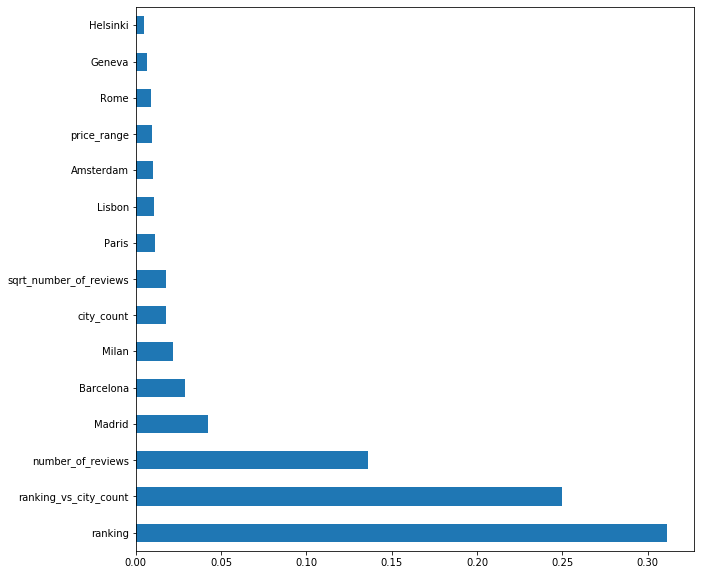

In [1523]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [1524]:
test_data.sample(10)

,ranking,price_range,number_of_reviews,rating,American,Asian,Bar,Barbecue,British,Cafe,...,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich,city_count,sqrt_number_of_reviews,ranking_vs_city_count
5183,5966.0,1,60.0,0.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,8982.000000,8.0,0.664217
5790,3778.0,2,15.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8982.000000,4.0,0.420619
5544,1774.0,2,2.0,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0.664046,1.0,2671.501673
6344,3885.0,2,49.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6642.000000,7.0,0.584914
4634,819.0,0,10.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1.798000,3.0,455.506118
9137,2717.0,0,5.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1352.000000,2.0,2.009615
8181,2527.0,2,250.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1352.000000,16.0,1.869083
5750,5911.0,0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6642.000000,0.0,0.889943
498,157.0,2,184.0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0.631695,14.0,248.537665
2497,1409.0,1,50.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.504718,7.0,2791.657916


In [1525]:
test_data = test_data.drop(['rating'], axis=1)

In [1526]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [1527]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [1528]:
predict_submission

array([3.025, 4.255, 4.545, ..., 3.02 , 4.495, 4.26 ])

In [1529]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.025
1,id_1,4.255
2,id_2,4.545
3,id_3,4.315
4,id_4,4.440
5,id_5,4.630
6,id_6,1.425
7,id_7,3.060
8,id_8,4.010
9,id_9,4.735


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
